In [126]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
%matplotlib inline


# add additional path to import scripts used in gui
import sys
sys.path.append('C:/Users/Experiment/PycharmProjects/PythonLab')
from functions.save_array_to_disk import *
# import functions.ScanPhotodiode_DAQ as GalvoScan
import functions.ScanAPD as GalvoScan




import hardware_modules.PiezoController as pc
import functions.tracking as track

# set variables =============================================
# ===========================================================

axis = 'Z' # 'X' for cold setup, 'Z' for RT setup


clim_min, clim_max = -0.03, 0 # for photo diode

clim_min, clim_max = 0, 50 # for APD

xController = pc.MDT693A(axis)

In [63]:
1+2

3

In [64]:
def acquire_roi_and_show(roi, title =''):

    xVmin,xVmax,xPts,yVmin,yVmax,yPts = track.roi_to_galvoparameter(roi)
    # acquire data
    scanner = GalvoScan.ScanNV(xVmin,xVmax,xPts,yVmin,yVmax,yPts,timePerPt, canvas = None)
    image_data = scanner.scan()

    X, Y = np.meshgrid( np.linspace(xVmin,xVmax,xPts),  np.linspace(yVmin,yVmax,yPts))

    # plot image
    fig = plt.figure()

    p = plt.pcolor(X, Y, image_data)
    # p = plt.imshow(image_data, interpolation="nearest")
    plt.colorbar()
#     p.set_clim(clim_min, clim_max)
    plt.xlim([xVmin, xVmax])
    plt.ylim([yVmin, yVmax])
    plt.title(title)
    plt.show()
    
    return image_data

# scan z  - no compensation for drifts

In [146]:
print roi_initial['xo']- roi_initial['dx']/2, roi_initial['xo']+ roi_initial['dx']/2
print roi_initial['yo']- roi_initial['dy']/2, roi_initial['yo']+ roi_initial['dy']/2

0.295 0.345
-0.265 -0.215


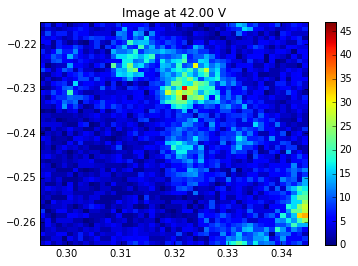

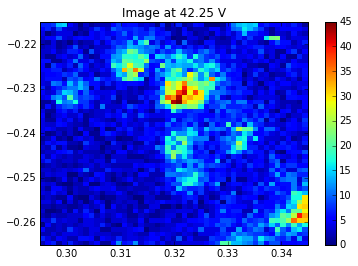

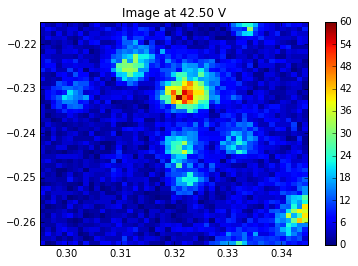

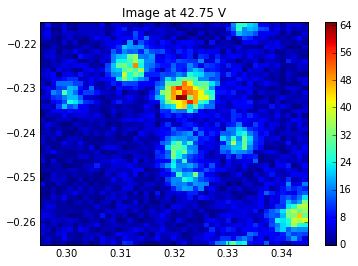

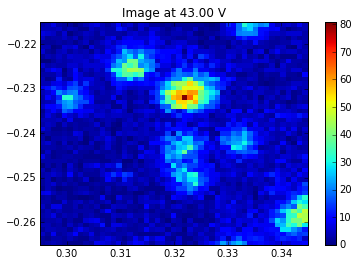

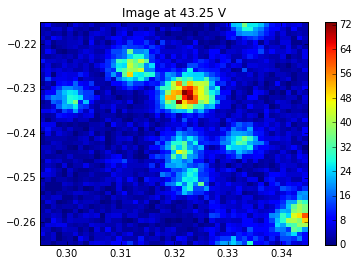

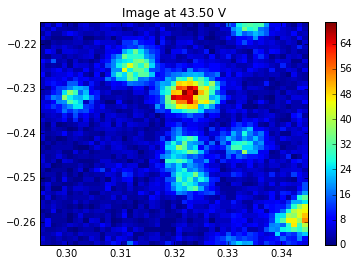

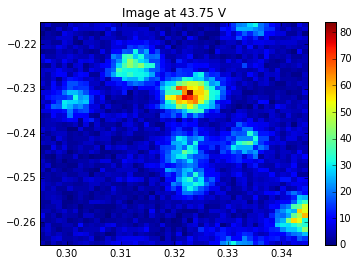

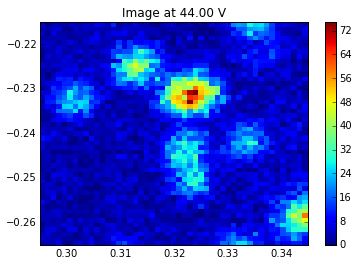

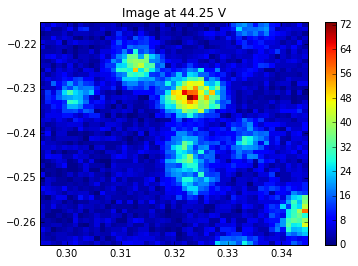

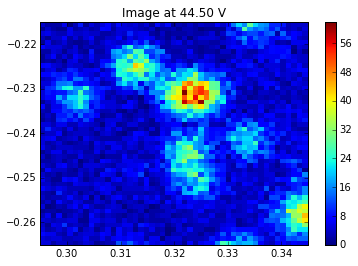

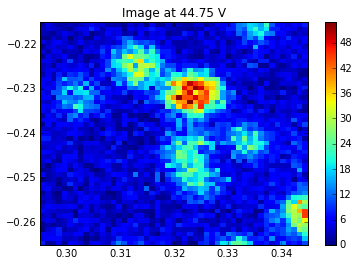

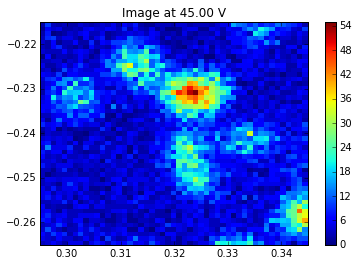

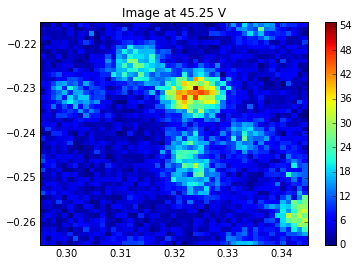

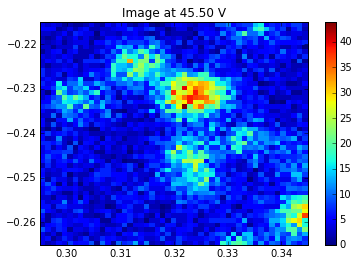

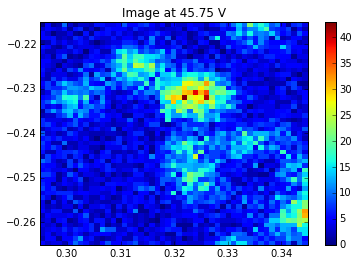

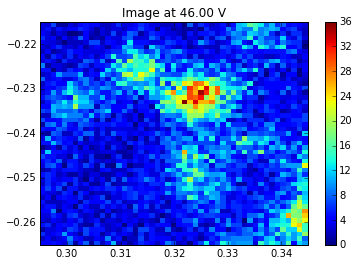

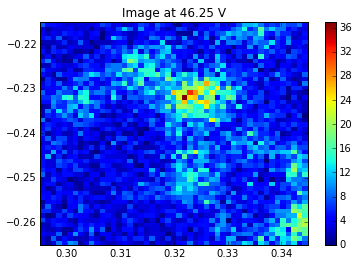

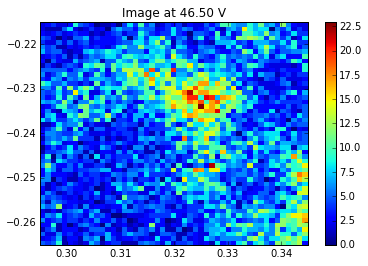

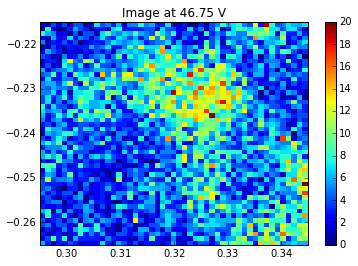

In [139]:
# settings ==================================================
# ===========================================================

roi_initial =  {
        'xo': .32, 'yo': -.24,
        'dx': 0.05, 'dy': 0.05,
        'xPts': 50, 'yPts': 50
    }



timePerPt = 0.001

voltages = np.arange(42,47,.25)

# ony needed if saving data
dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/Box_c4_r3_ScanFocus_Beam_6/'

tag = 'Si3Ni4_withPads'



#run script =================================================
# ===========================================================



image_std_dev = []

for counter, voltage in enumerate(voltages):
    
    title = 'Image at {:0.2f} V'.format(voltage)
    # set focus
    xController.setVoltage(voltage)

    image_data = acquire_roi_and_show(roi_initial, title)
    
    image_std_dev.append( [voltage, np.std(image_data)])

    # save image and data
#     save_image_and_data(fig, imageData, dirpath, '{:s}_V_{:02d}'.format(tag, voltage))

43.791239808491902

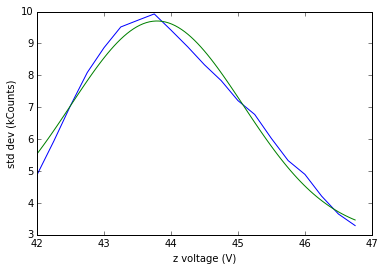

In [144]:
gaussian = lambda params, x: params[0]*np.exp(-(x-params[1])**2/(2.*params[2]**2)) + params[3]
errfunc = lambda params, x, y: gaussian(params, x)-y 

initial_params = [10., voltages[np.argmax(std_dev_data[:,1])], 2, 2]
fitted_params, success = sp.optimize.leastsq(errfunc, initial_params, args=(voltages, std_dev_data[:,1]))


std_dev_data = np.array(image_std_dev)
plt.plot(std_dev_data[:, 0], std_dev_data[:,1]);

plt.plot(np.linspace(np.min(voltages), np.max(voltages), 100),
               gaussian(fitted_params, np.linspace(np.min(voltages), np.max(voltages), 100)));

plt.xlabel('z voltage (V)')
plt.ylabel('std dev (kCounts)')

fitted_params[1]

In [143]:
np.mean(voltages)



43.75

In [145]:
xController.setVoltage(43.8)

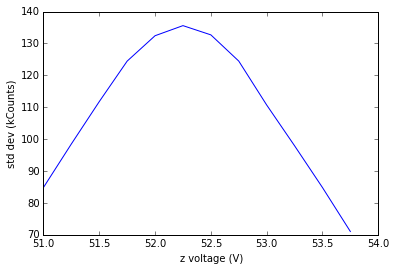

In [117]:
plt.plot(focusing_data_on_markers[:, 0], focusing_data_on_markers[:,1])



plt.xlabel('z voltage (V)')
plt.ylabel('std dev (kCounts)')
#focusing_data_on_markers = std_dev_data

# scan z and compensate for drifts - not finished!!!

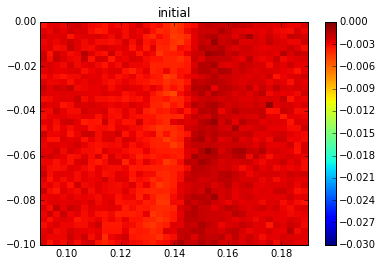

starting
new roi (xo, yo) = (0.140, -0.050)


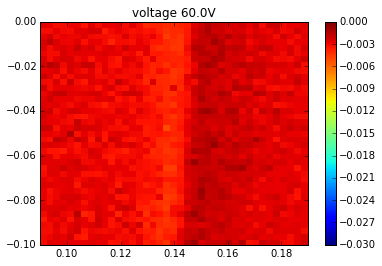

new roi (xo, yo) = (0.141, -0.049)


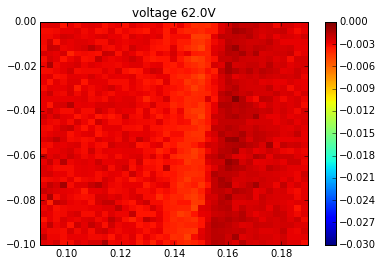

new roi (xo, yo) = (0.142, -0.048)


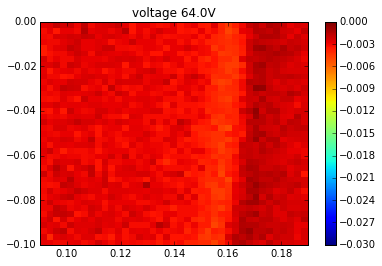

new roi (xo, yo) = (0.142, -0.046)


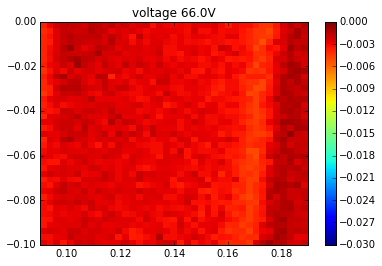

new roi (xo, yo) = (0.141, -0.045)


In [5]:
# settings ==================================================
# ===========================================================

roi_initial = {
        "xo": 0.14, 'yo': -0.05,
        "dx": 0.1, 'dy': 0.1,
        'xPts': 40, 'yPts': 40
    }

timePerPt = 0.001

voltages = np.arange(62,65,5)
voltages = np.array([60, 62, 64, 66])
# ony needed if saving data
dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/Box_c4_r3_ScanFocus_Beam_6/'

tag = 'Si3Ni4_withPads'

xController.setVoltage(voltages[0])

#run script =================================================
# ===========================================================

xController = pc.MDT693A('X')

image_std_dev = []
roi = roi_initial.copy()

image_data = acquire_roi_and_show(roi_initial, 'initial')

print 'starting'
print 'new roi (xo, yo) = ({:0.3f}, {:0.3f})'.format(roi['xo'], roi['yo'])

for counter, voltage in enumerate(voltages):
    image_data_old = image_data
#     print 'voltage {:0.1f}V' .format(voltage)
    # set focus
    xController.setVoltage(voltage)

    image_data = acquire_roi_and_show(roi_initial, 'voltage {:0.1f}V'.format(voltage))
    
    image_std_dev.append( [voltage, np.std(image_data)])
    
    roi.update(track.find_beam_position(image_data_old, image_data, roi))
    
    print 'new roi (xo, yo) = ({:0.3f}, {:0.3f})'.format(roi['xo'], roi['yo'])
    
    # save image and data
#     save_image_and_data(fig, imageData, dirpath, '{:s}_V_{:02d}'.format(tag, voltage))

# playing around

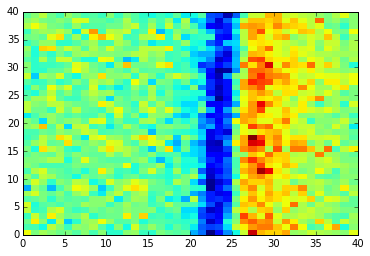

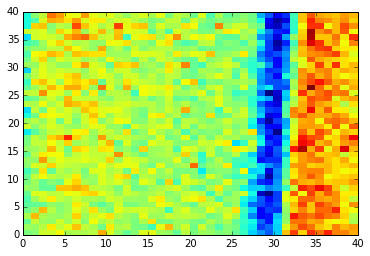

In [15]:
plt.pcolor(image_data_old)
plt.figure()
plt.pcolor(image_data)

19 19
19 19


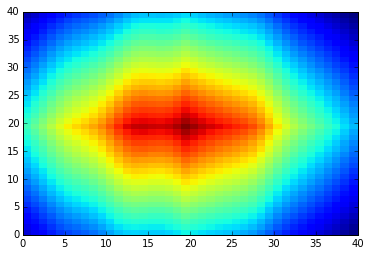

In [17]:
from scipy import signal

cor = signal.correlate2d (image_data_old, image_data_old, mode='same')
initial_max_y, initial_max_x = np.unravel_index(np.argmax(cor),cor.shape)

cor = signal.correlate2d (image_data_old, image_data, mode='same')
max_y, max_x = np.unravel_index(np.argmax(cor),cor.shape)


print max_y, max_x
print initial_max_y, initial_max_x

plt.pcolor(cor)

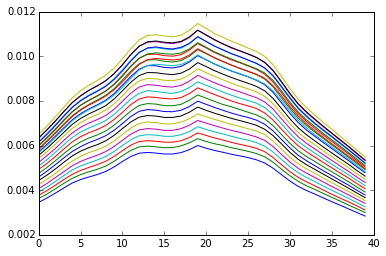

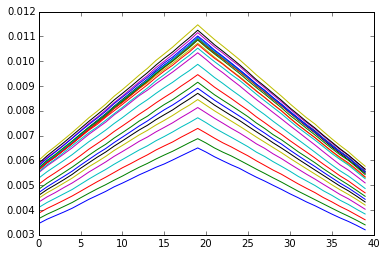

In [25]:
for i in np.arange(25):
    plt.plot(cor[i,:])
plt.figure()
for i in np.arange(25):
    plt.plot(cor[:,i])

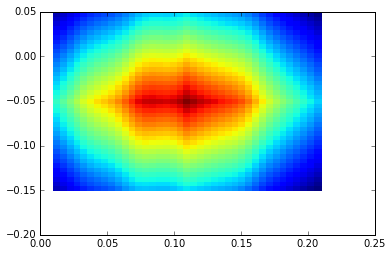

In [61]:
import scipy.optimize as opt
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

x = np.linspace(roi['xo'] - roi['dx'], roi['xo'] + roi['dx'], roi['xPts'])
y = np.linspace(roi['yo'] - roi['dy'], roi['yo'] + roi['dy'], roi['yPts'])
x, y = np.meshgrid(x, y)

initial_guess = (np.max(cor), x[0,max_x], y[max_y,0], roi['dx']/2, roi['dy']/2,0,0)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), cor.flatten(), p0=initial_guess)



plt.pcolor(x, y, cor)

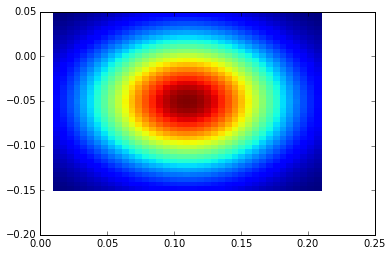

In [62]:
plt.pcolor(x, y, twoD_Gaussian((x,y), *initial_guess).reshape(cor.shape) )

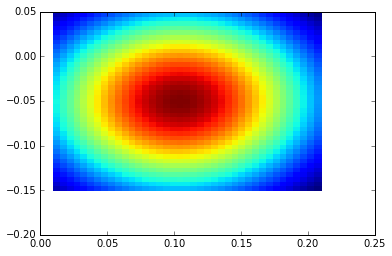

In [63]:
plt.pcolor(x, y, twoD_Gaussian((x,y), *popt).reshape(cor.shape) )

0.101981820839 -0.0522548925134


In [80]:
print popt[1], popt[2]
print initial_guess[1], initial_guess[2]
print roi['xo'], roi['yo']

0.101981820839 -0.0522548925134
0.107435897436 -0.0525641025641
0.11 -0.05


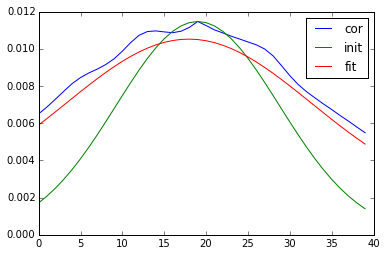

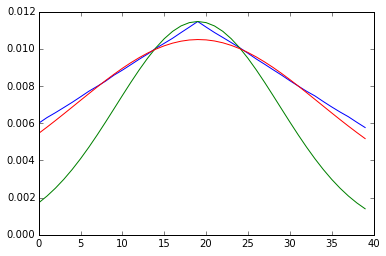

In [72]:
i = 19
fit = twoD_Gaussian((x,y), *popt).reshape(cor.shape) 
init = twoD_Gaussian((x,y), *initial_guess).reshape(cor.shape) 
plt.plot(cor[i,:], label = 'cor')
plt.plot(init[i,:], label = 'init')
plt.plot(fit[i,:], label = 'fit')
plt.legend(loc = 0)
plt.figure()
plt.plot(cor[:,i])
plt.plot(init[:,i])
plt.plot(fit[:,i])